<a href="https://colab.research.google.com/github/MatheusRobles/Ex_Machine_Learn_I/blob/main/EX_Machine_Learn_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MatheusRobles/Ex_Machine_Learn_I/main/yeast.csv')

In [3]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [4]:
df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


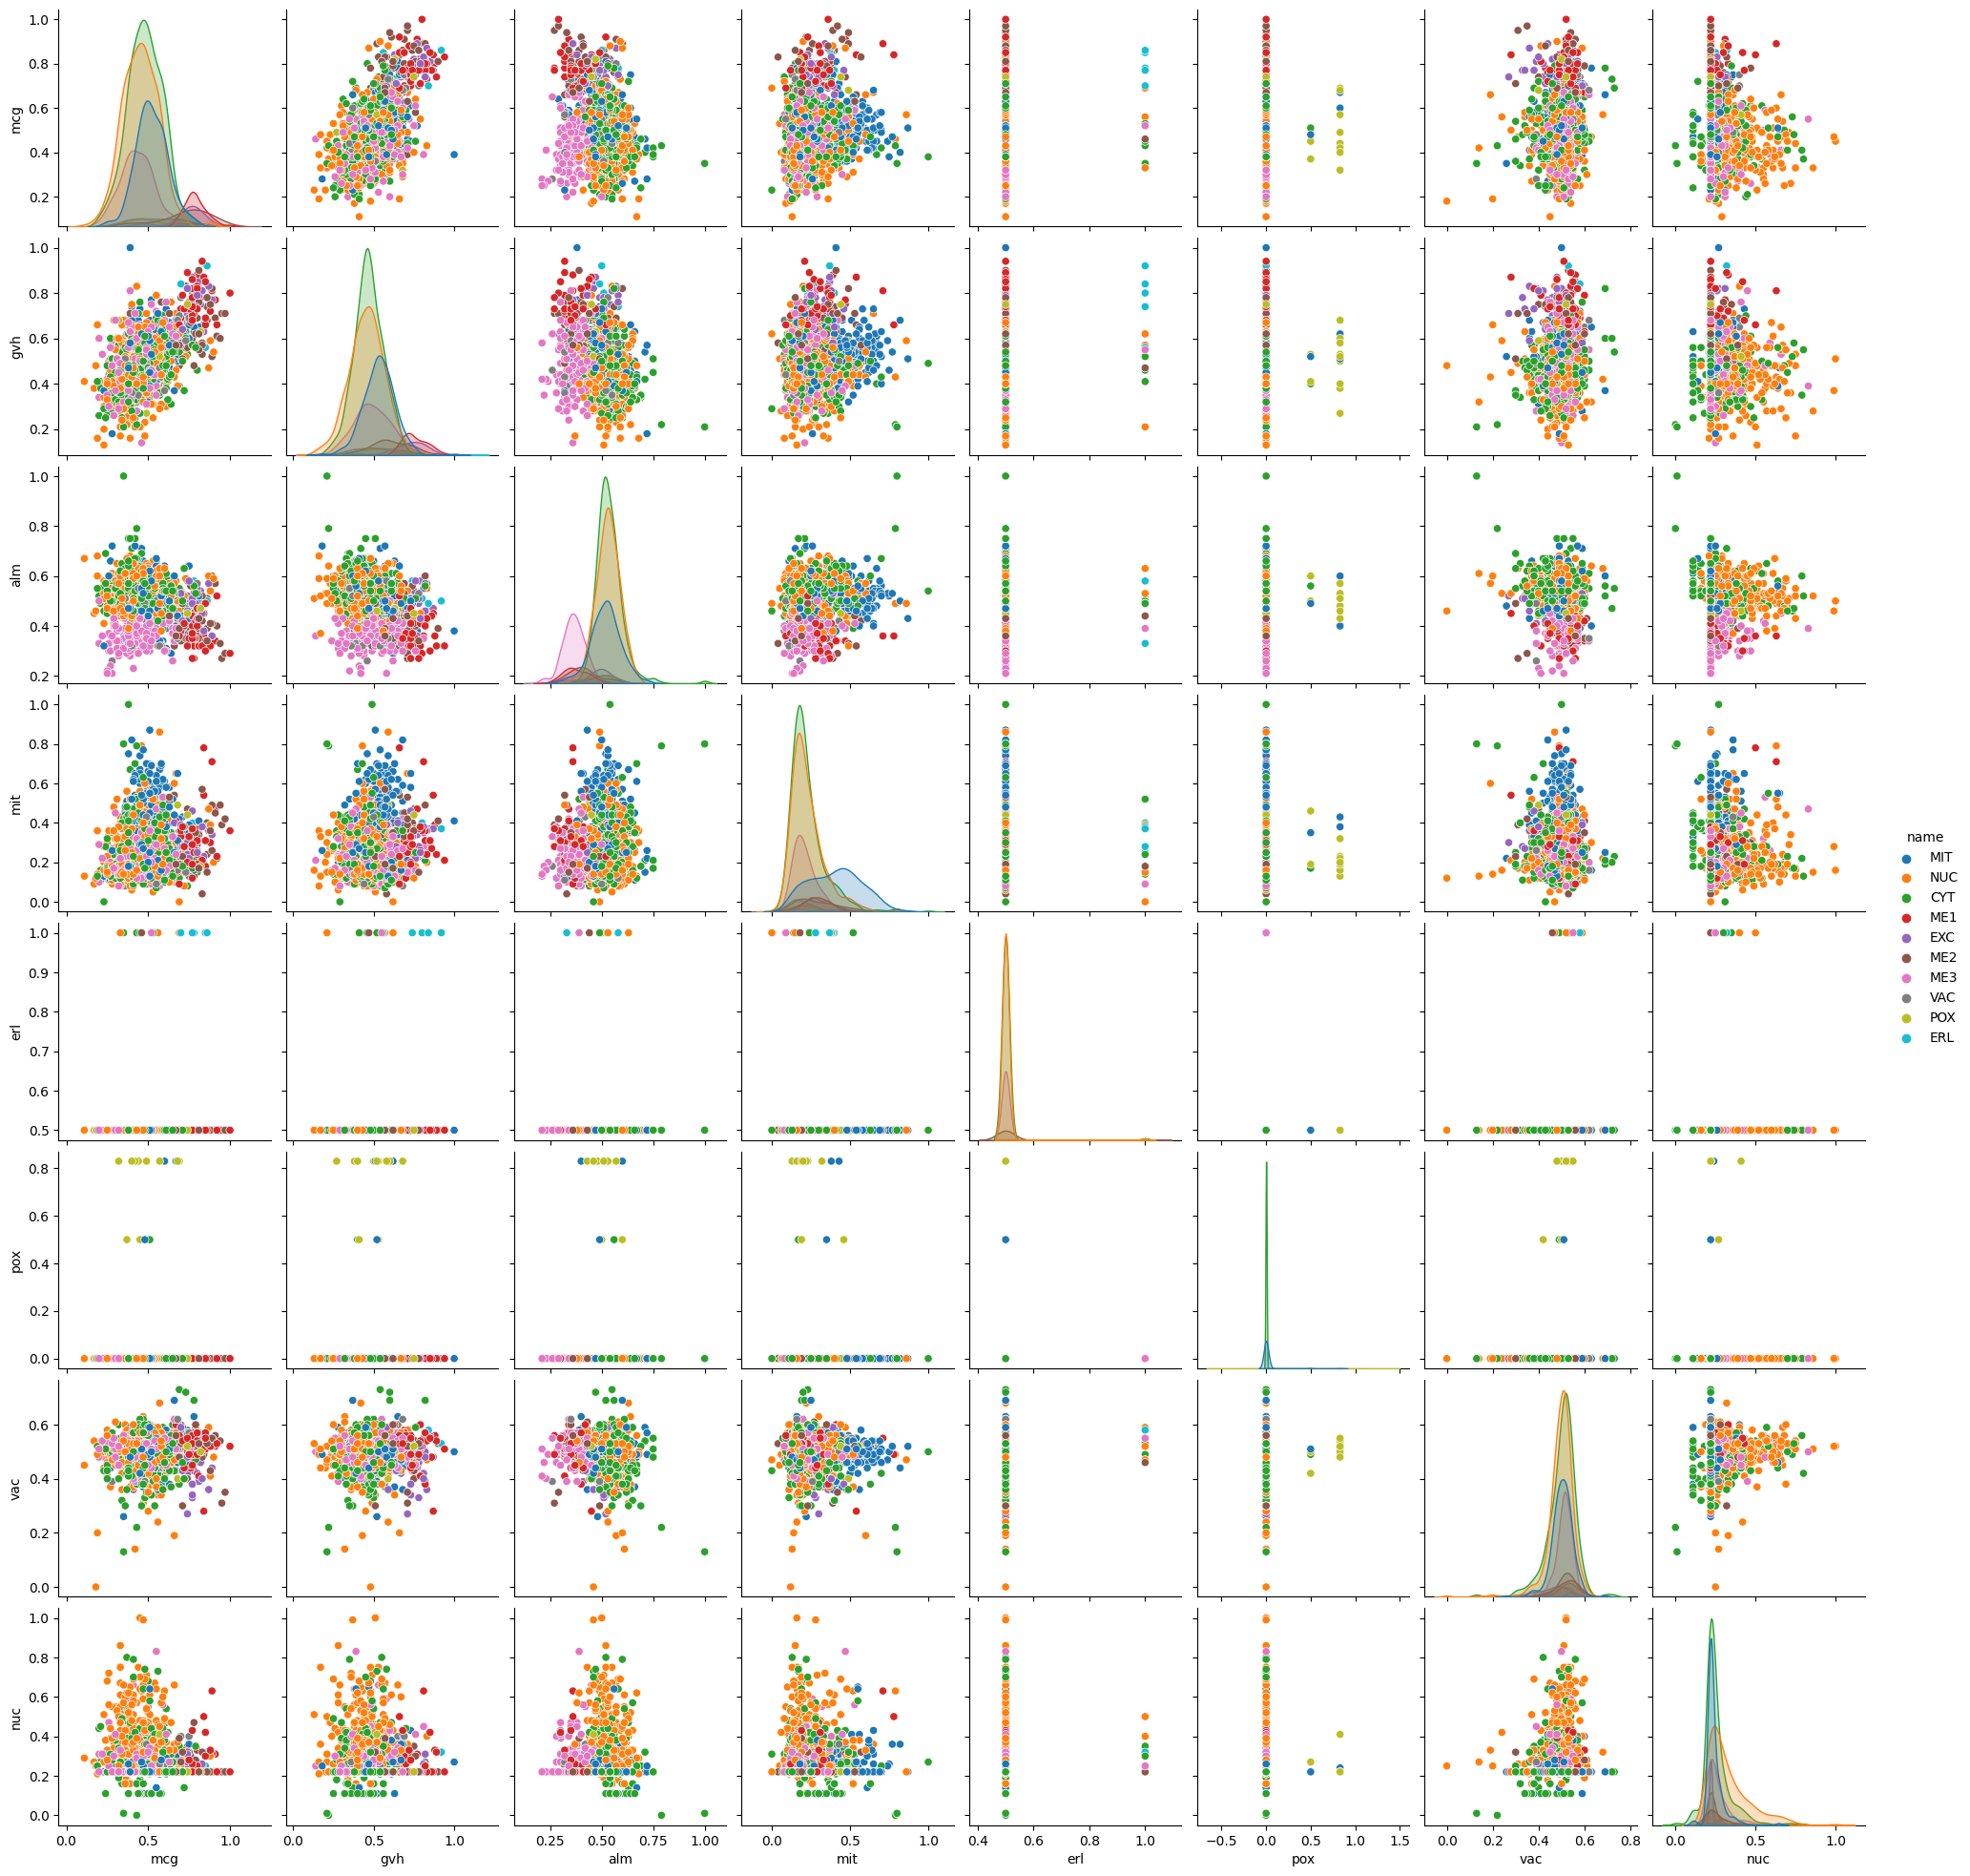

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

features = df.drop("name", axis=1)
labels = df["name"]
pairplot_data = pd.concat([features, labels], axis=1)
sns.pairplot(pairplot_data, hue="name")
plt.show()

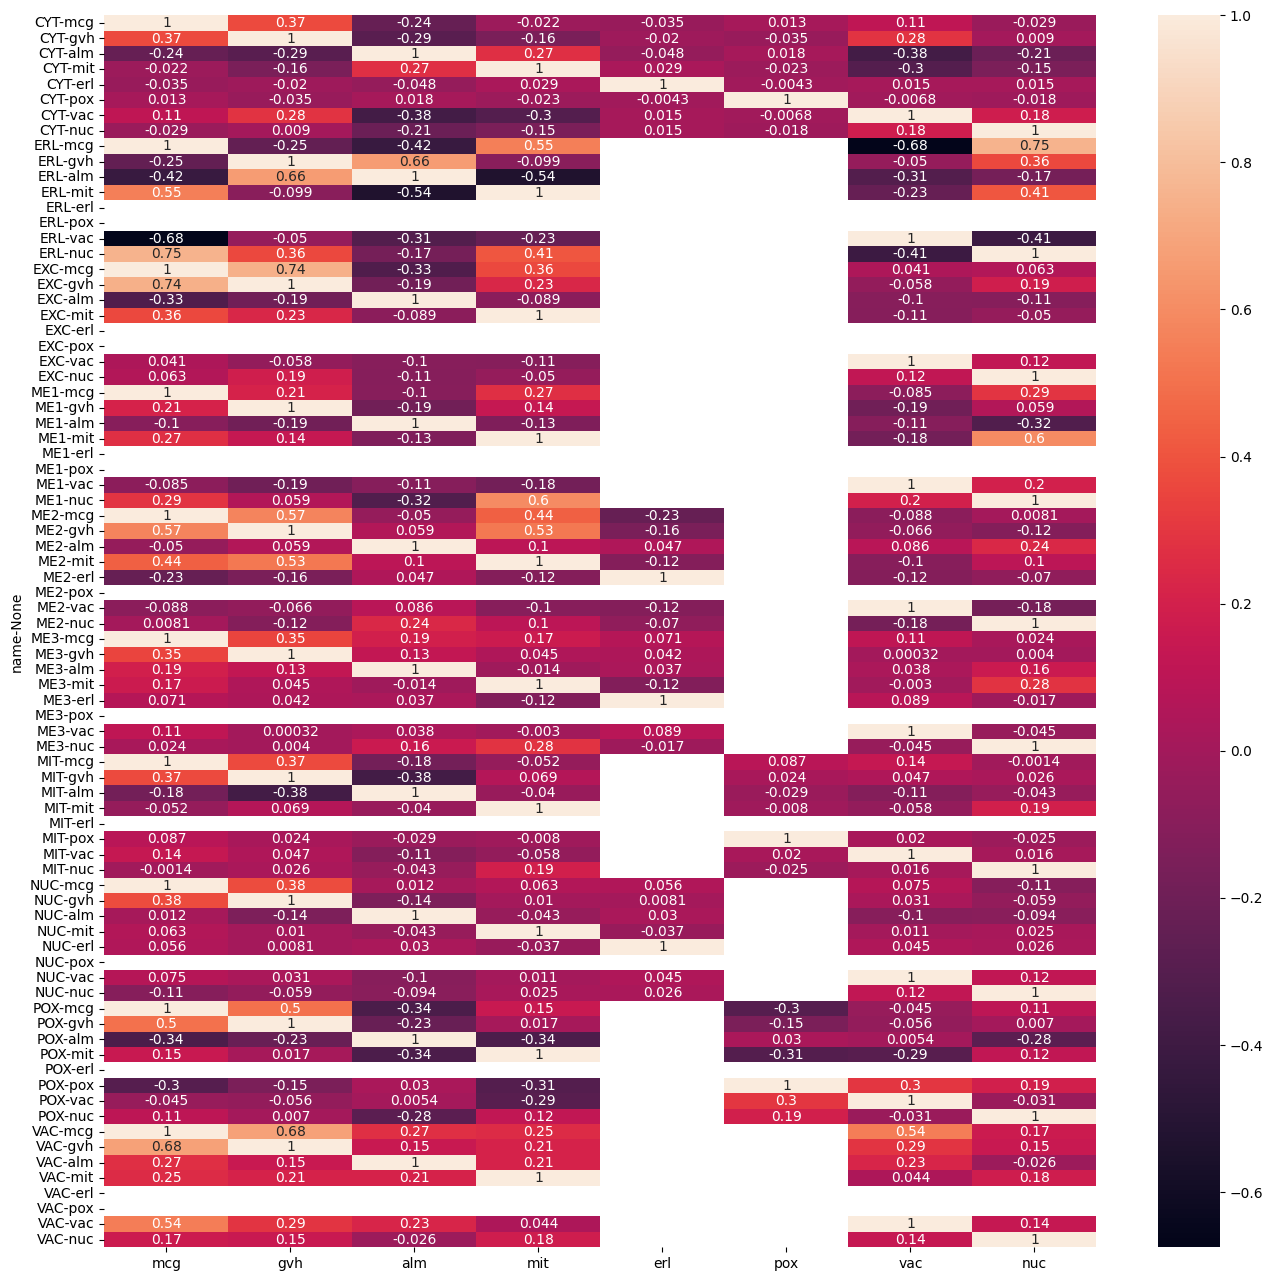

In [20]:
corr = pairplot_data.groupby('name').corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True)
plt.show()

In [33]:
encoded_df = pd.get_dummies(df, columns=['name'])
encoded_df

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name_0,name_1,name_2,name_3,name_4,name_5,name_6,name_7,name_8,name_9
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,0,0,0,0,0,0,1,0,0,0
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,0,0,0,0,0,0,1,0,0,0
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,0,0,0,0,0,0,1,0,0,0
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,0,0,0,0,0,0,0,1,0,0
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,0,0,0,0,1,0,0,0,0,0
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,0,0,0,0,0,0,0,1,0,0
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,0,0,0,0,1,0,0,0,0,0
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,0,0,0,0,0,0,0,1,0,0


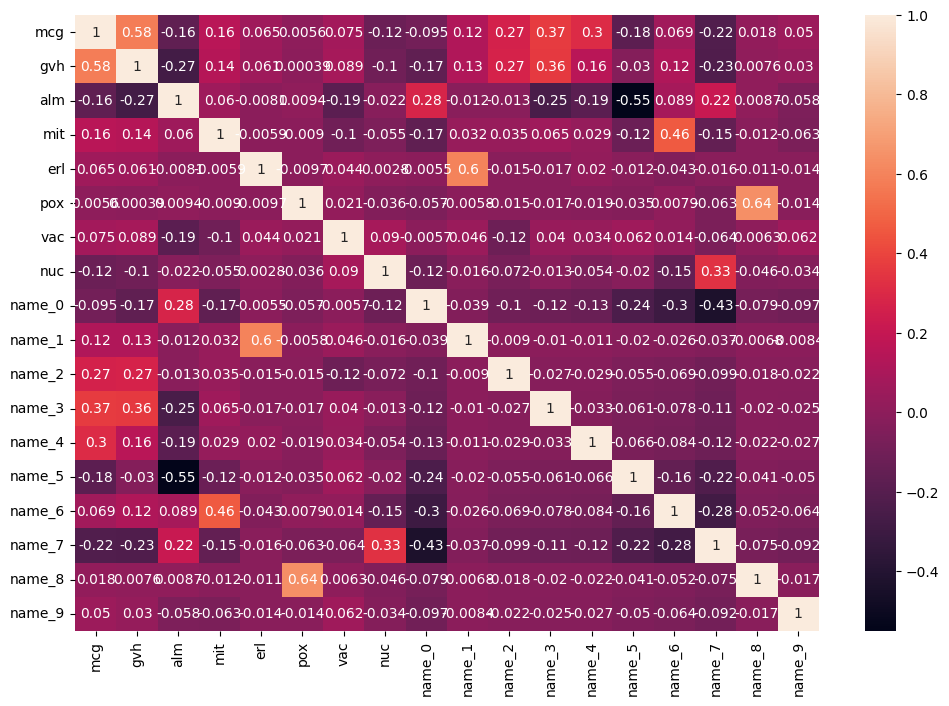

In [34]:
corr = encoded_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.show()

Com one-hot enconding fica bem mais facil de visualizar a relação entre as variaveis.

In [35]:
from sklearn.preprocessing import LabelEncoder
name_encoder=LabelEncoder()
df["name"]=name_encoder.fit_transform(df["name"].values)

In [36]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


In [37]:
name_counts = df['name'].value_counts()
print(name_counts)

0    463
7    429
6    244
5    163
4     51
3     44
2     35
9     30
8     20
1      5
Name: name, dtype: int64


In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [39]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo de regressão linear
lr = LinearRegression()

# Treinar o modelo
lr.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred = lr.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir as métricas de avaliação
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.5652545822616104
Mean Squared Error (MSE): 8.528352827574146
R-squared (R2): 0.08334412780745659
